### Load images, apply open cv's Canny function, then display

#### load and display our first image

In [8]:
import cv2
import numpy as np
from PIL import Image

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import matplotlib.pyplot as plt

def display_array_as_img(img):
    img = Image.fromarray(img, mode="L")
    if img.mode != "RGB":
        img_to_print = img.convert("L")
    display(img_to_print)

In [9]:
img = cv2.imread('moose1.jpg',0)
display_array_as_img(img, False)

### Create a histogram to view distribution of pixels

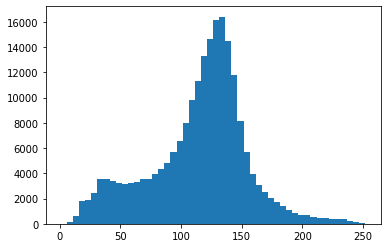

In [10]:
# view the histogram of the moose image's pixel colours
plt.hist(img.ravel(), bins=50)
plt.show()

### Choose values for the min and max based off of histogram
---
The min_val and max_val refer to the hysteresis thresholding, which decides what is an edge, and what is not  
Refer to section 4 in https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_canny/py_canny.html   
Choose min_val from just left of the peak, and max_val from right of the peak   
pretty good results, the background is completely eliminated, although the moose is missing some lines

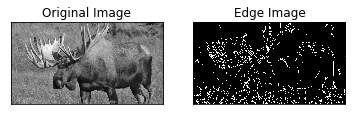

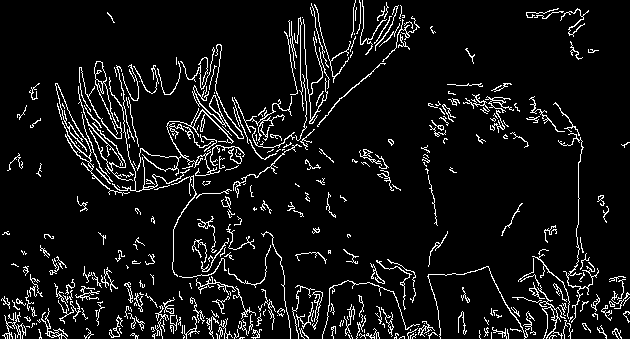

In [11]:
min_val = 100
max_val = 250
edges = cv2.Canny(img,min_val,max_val,True)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

display_array_as_img(edges, False)

increasing the max_val to 500 from 250 reduces noise effectively to zero, while losing a small portion of the back of the moose

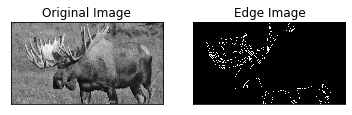

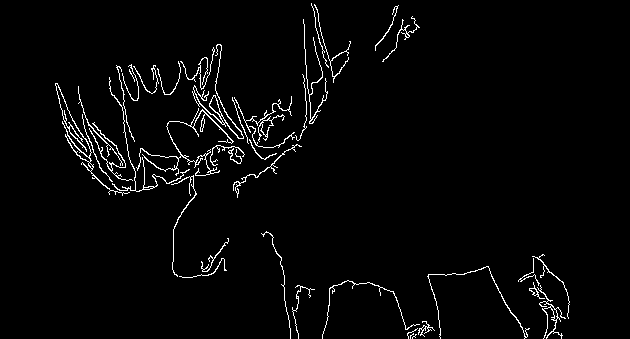

In [12]:
min_val = 100
max_val = 500
edges = cv2.Canny(img,min_val,max_val,True)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

display_array_as_img(edges, False)

### Display the edges image with sliders
---
Try out and observer the effects of changing the min and max values.  
The slider displays only when run locally

In [13]:
def f(min_val, max_val):
    edges = cv2.Canny(img,min_val,max_val,True)
    display_array_as_img(edges, False)

    
interact(f, min_val=100, max_val=200);

interactive(children=(IntSlider(value=100, description='min_val', max=300, min=-100), IntSlider(value=200, des…

### Load our second moose picture

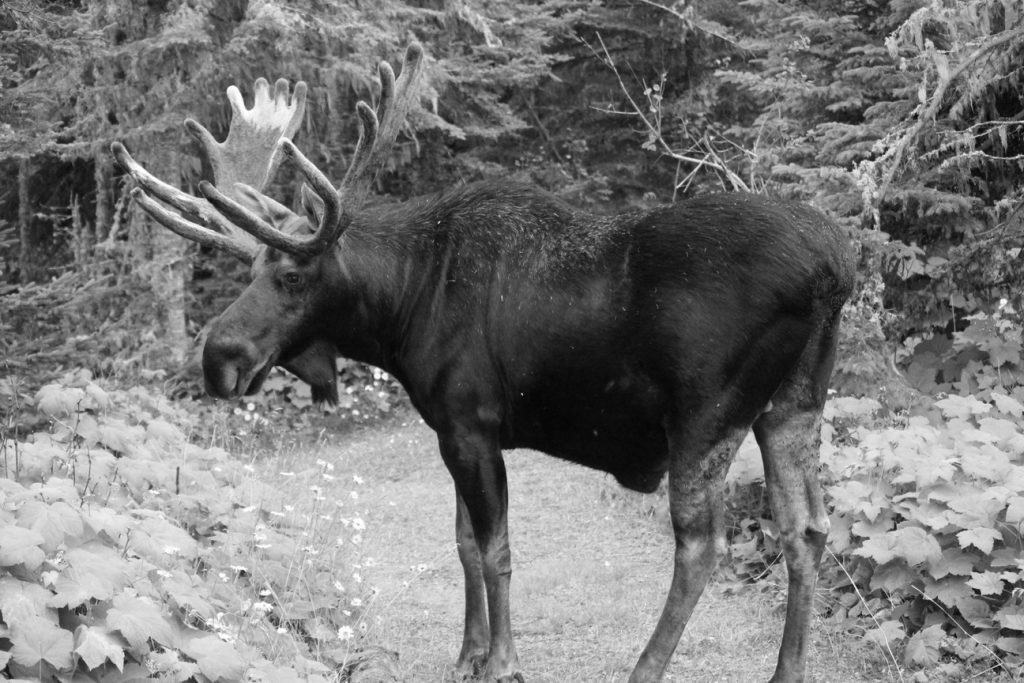

In [14]:
img = cv2.imread('moose.jpg',0)
display_array_as_img(img)

### View histogram of pixels
---
The histogram of pixels is plateau shaped, so it will be difficult to isolate the moose's shape.  
Setting min at 175 and max at 250 we will attempt to isolate the tallest peak.  
These settings give us a fairly well defined moose, but the noise in the background has not been eliminated

In [15]:
# view the histogram of the moose image's pixel colours
img = cv2.imread("moose.jpg", 0)

plt.hist(img.ravel(), bins=50)
plt.show()

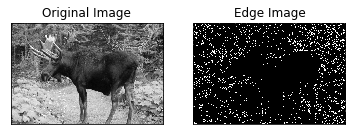

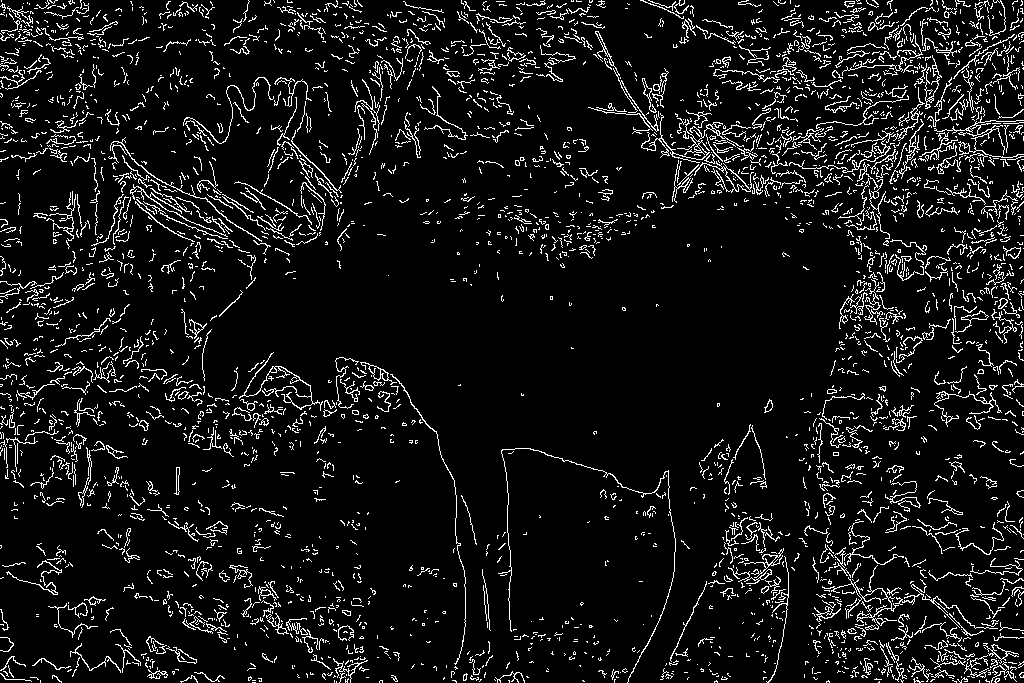

In [16]:
min_val = 175
max_val = 250

edges = cv2.Canny(img,min_val,max_val,True)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()
display_array_as_img(edges, False)

### Use the histogram's mean +/- 25% to create the thresholds
---
Using this creates even more background noise

119.12804407256588 89.34603305442441 148.91005509070735


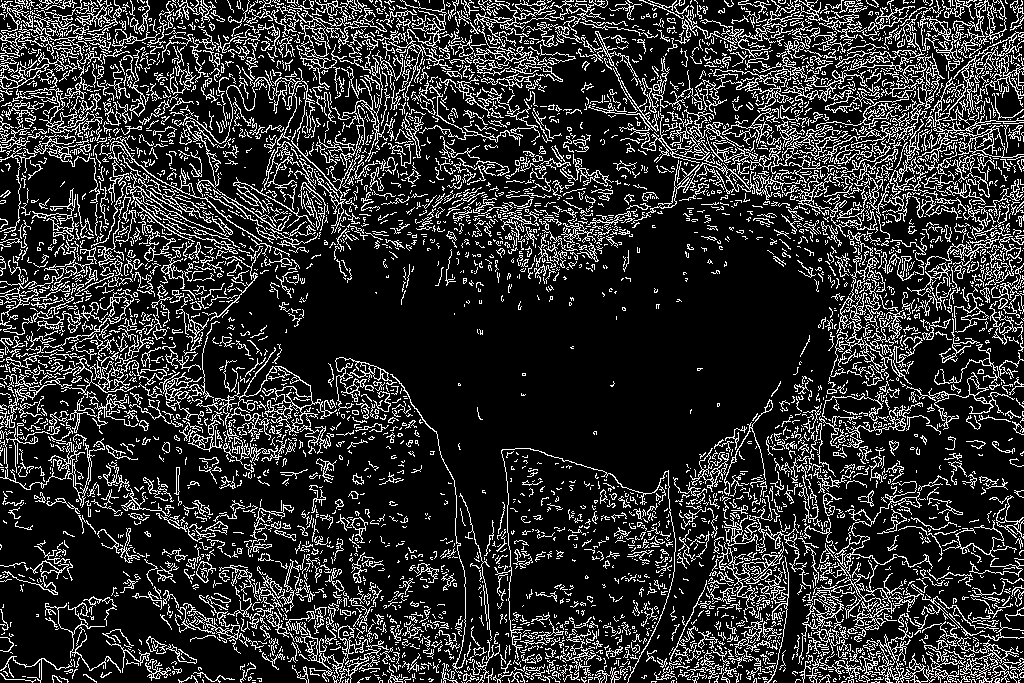

In [17]:
# create thresholds at the histogram's means +/- 25%
mean = np.mean(img.ravel())
lower = mean - mean * 0.25
upper = mean + mean * 0.25
print(mean, lower, upper)
edges = cv2.Canny(img,lower,upper,True)

display_array_as_img(edges)

In [18]:
interact(f, min_val=100, max_val=200);

interactive(children=(IntSlider(value=100, description='min_val', max=300, min=-100), IntSlider(value=200, des…

### Exploring a higher contrast image of penguins

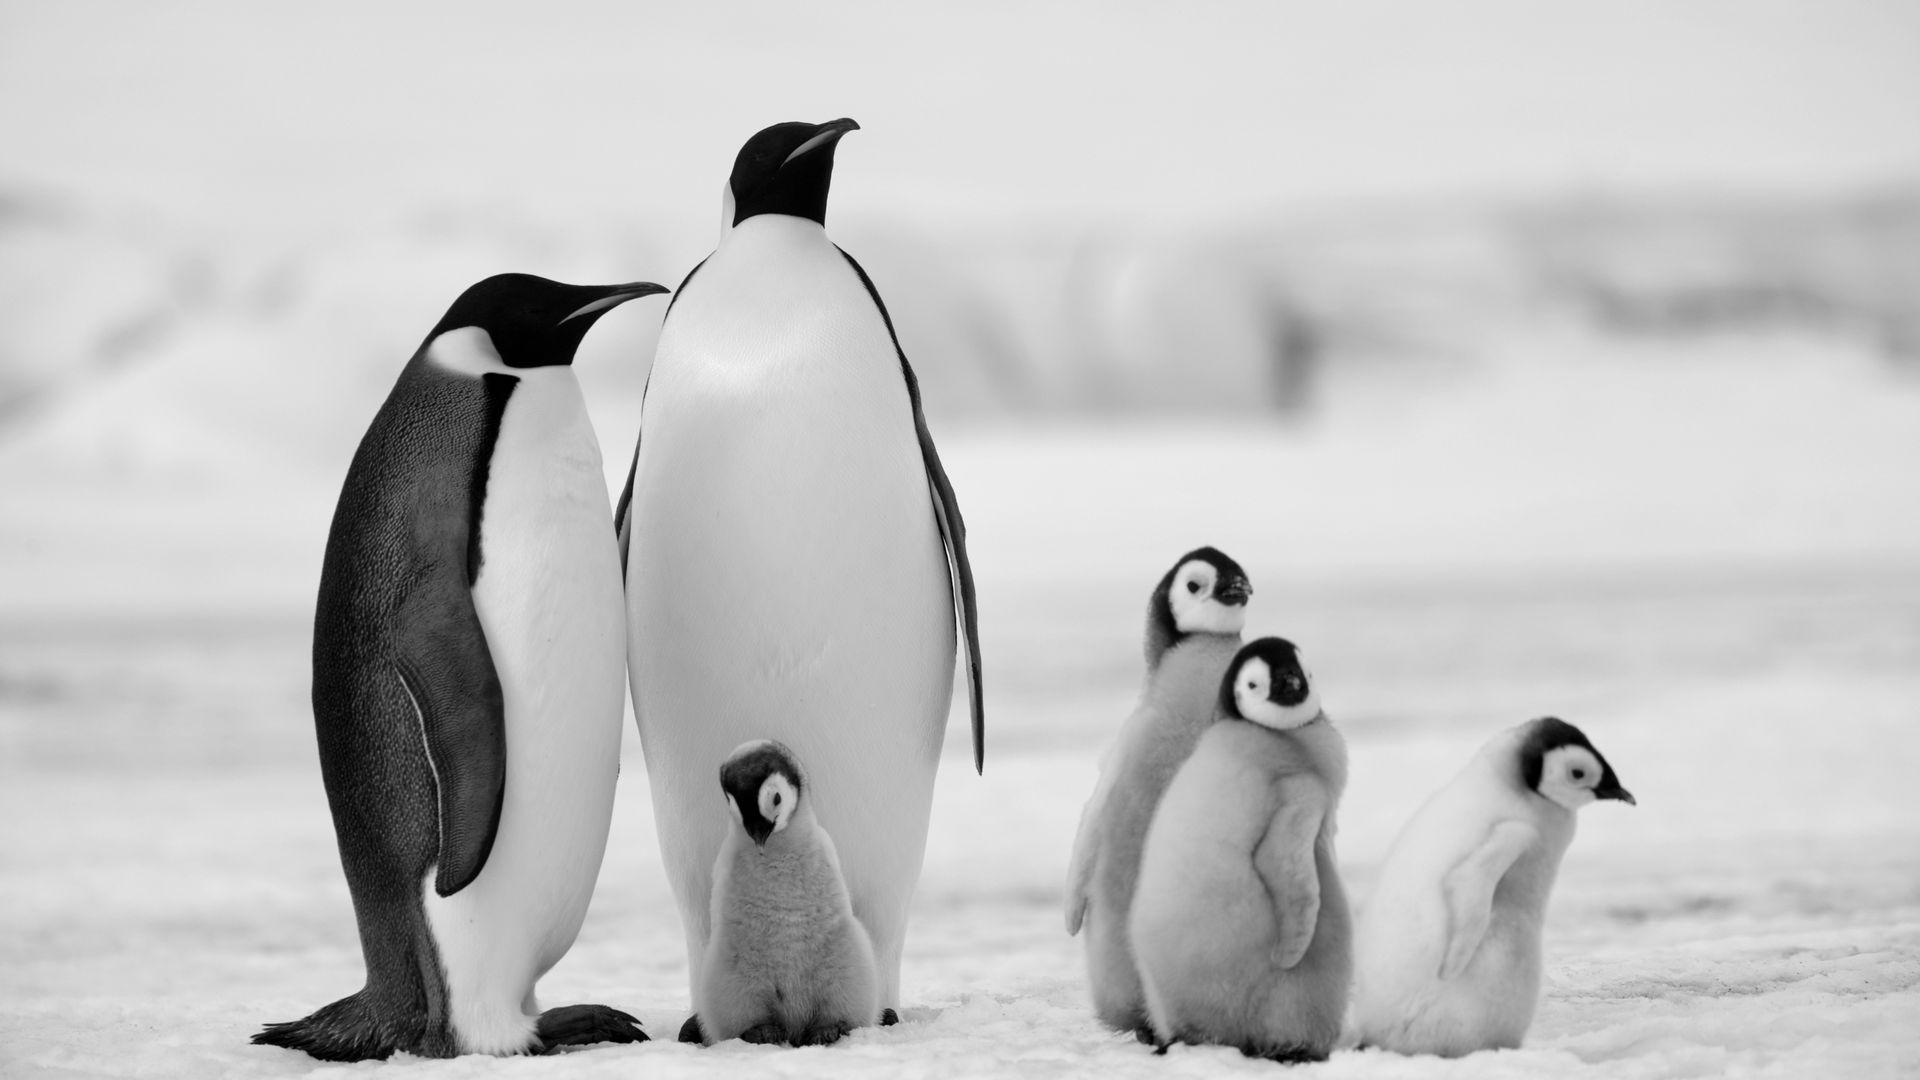

In [19]:
img = cv2.imread("penguins.jpg", 0)
display_array_as_img(img)

In [20]:
plt.hist(img.ravel(), bins=50)
plt.show()

### Selecting thresholds
---
Selecting min of 150 and max of 250, based on the single peak of the histogram gives us good outlines of the adult penguins, the outlines of young penguins' heads, and effectively zero noise

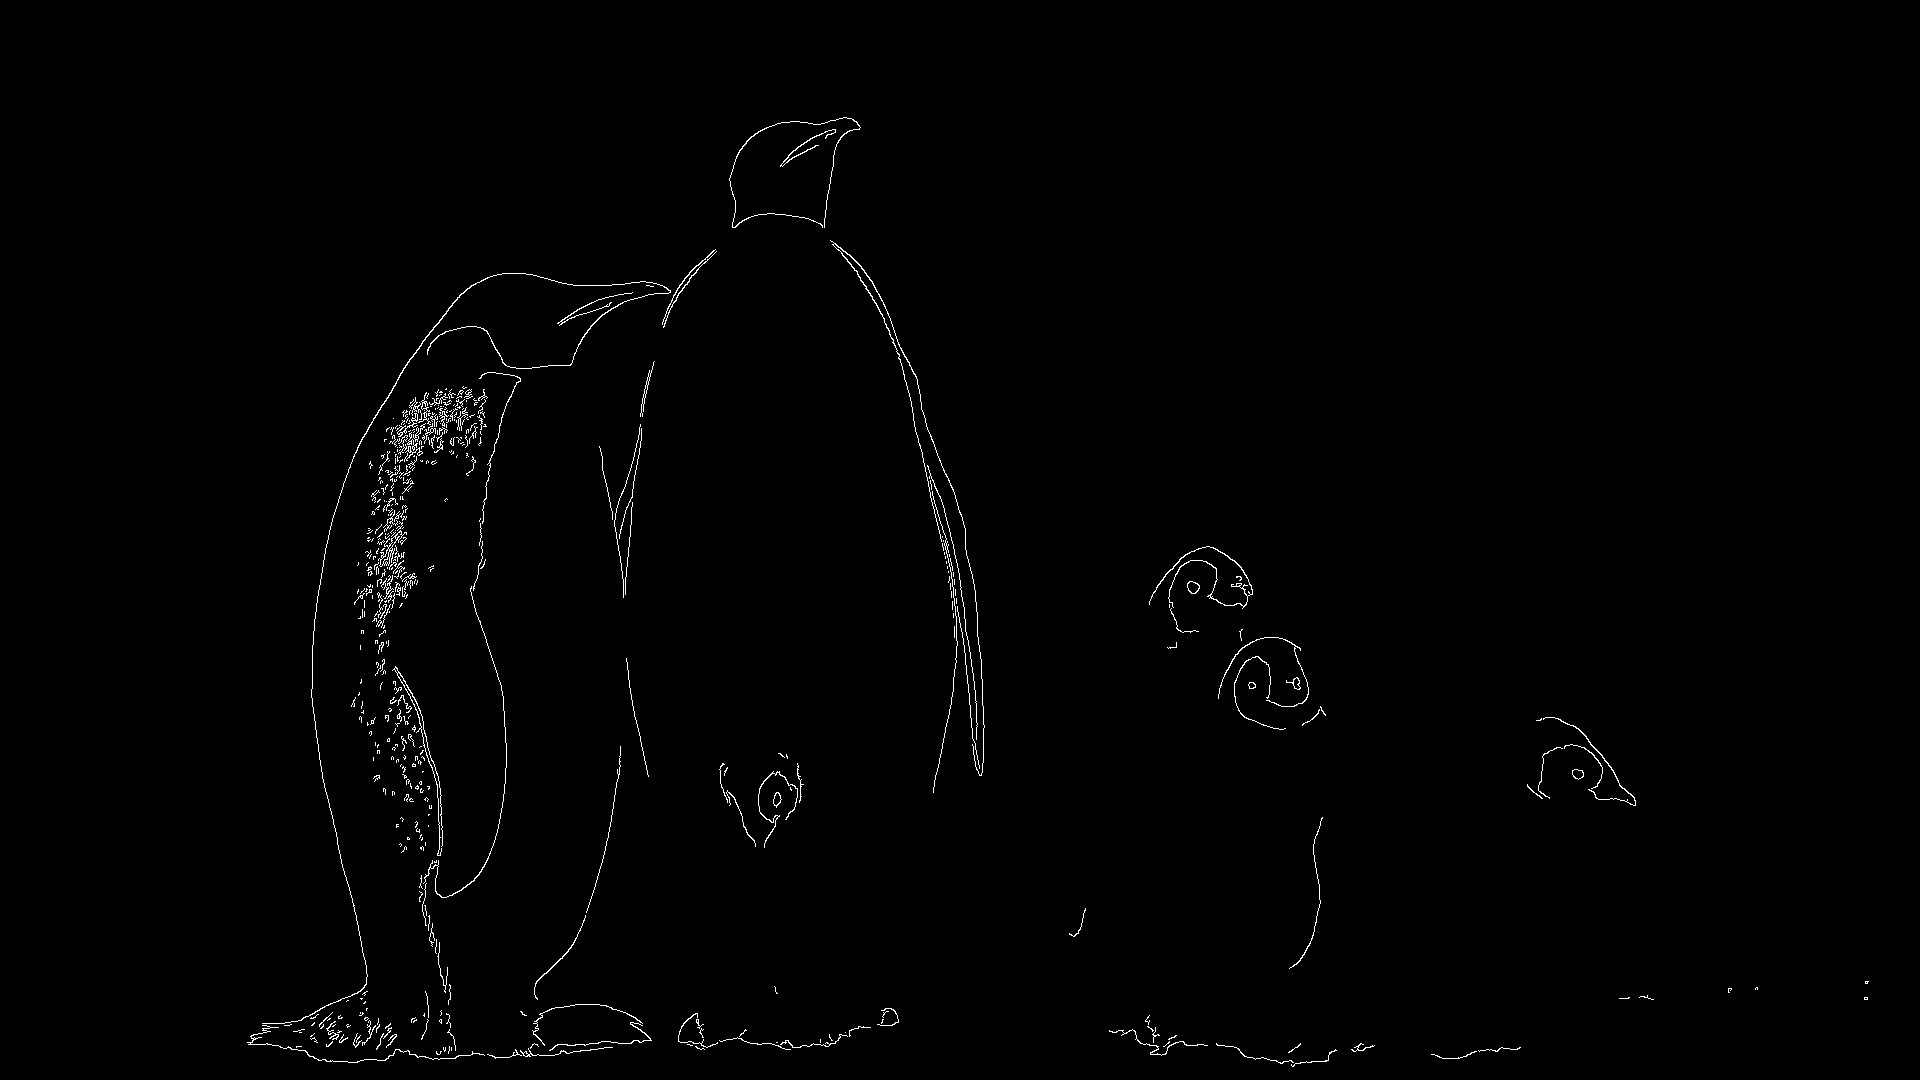

In [21]:
min_val = 150
max_val = 250

edges = cv2.Canny(img,min_val,max_val,True)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()
display_array_as_img(edges, False)

In [22]:
interact(f, min_val=100, max_val=200);

interactive(children=(IntSlider(value=100, description='min_val', max=300, min=-100), IntSlider(value=200, des…